<a href="https://colab.research.google.com/github/Omkar2499/Dataset/blob/main/probability_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -qq train-set.zip

In [2]:
import tensorflow as tf

import os

import shutil

import numpy as np

from sklearn.model_selection import train_test_split

classes = ["dry_concrete_slight", "dry_mud", "water_concrete_slight", "dry_asphalt_smooth", "dry_asphalt_slight", "wet_gravel", "water_gravel", "water_mud", "water_concrete_smooth", "dry_gravel", "ice", "wet_asphalt_severe", "wet_asphalt_smooth", "water_asphalt_severe", "water_asphalt_slight", "dry_concrete_smooth", "wet_concrete_severe", "fresh_snow", "melted_snow", "wet_asphalt_slight", "wet_mud", "dry_asphalt_severe", "water_asphalt_smooth", "wet_concrete_smooth", "dry_concrete_severe", "water_concrete_severe", "wet_concrete_slight"
] # replace with your actual class names

data_dir = '/content/train-set'

train_dir = 'train-set/train'

test_dir = 'train-set/test'

# Create train and test directories

os.makedirs(train_dir, exist_ok=True)

os.makedirs(test_dir, exist_ok=True)

for cls in classes:

    # Create class-specific train and test directories

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)

    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Get a list of all image files for this class

    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets

    train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=42)  # 80% train, 20% test

    # Copy the train files into the train directory

    for file in train_files:

        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))

    # Copy the test files into the test directory

    for file in test_files:

        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))

In [3]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.optimizers import Adam

import scipy

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define the data generators

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(

    'train-set/train',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(

    'train-set/test',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical')

Found 5670 images belonging to 27 classes.
Found 2430 images belonging to 27 classes.


In [4]:
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model

headModel = baseModel.output

headModel = Flatten(name="flatten")(headModel)

headModel = Dense(512, activation="relu")(headModel)

headModel = Dense(27, activation="softmax")(headModel)  # Change the number here according to your number of classes

# Place the head FC model on top of the base model (this will become the actual model we will train)

model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process

for layer in baseModel.layers:

    layer.trainable = False

# Compile the model

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping, model_checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 83s 388ms/step - accuracy: 0.1485 - loss: 2.9906 - val_accuracy: 0.2765 - val_loss: 2.4697
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 37s 205ms/step - accuracy: 0.3347 - loss: 2.2600 - val_accuracy: 0.2885 - val_loss: 2.3313
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.4394 - loss: 1.9390 - val_accuracy: 0.3193 - val_loss: 2.2358
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 191ms/step - accuracy: 0.5043 - loss: 1.7297 - val_accuracy: 0.3329 - val_loss: 2.1773
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 192ms/step - accuracy: 0.5372 - loss: 1.6011 - val_accuracy: 0.3300 - val_loss: 2.1536
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.5857 - loss: 1.4597 - val_accuracy: 0.3638 - val_loss: 2.0732
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 39s 185ms/step - accuracy: 0.6316 - loss: 1.3128 - val_accuracy: 0.3432 - val_loss: 2.1217
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.6615 - loss: 1.2311 - val

Found 2430 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step


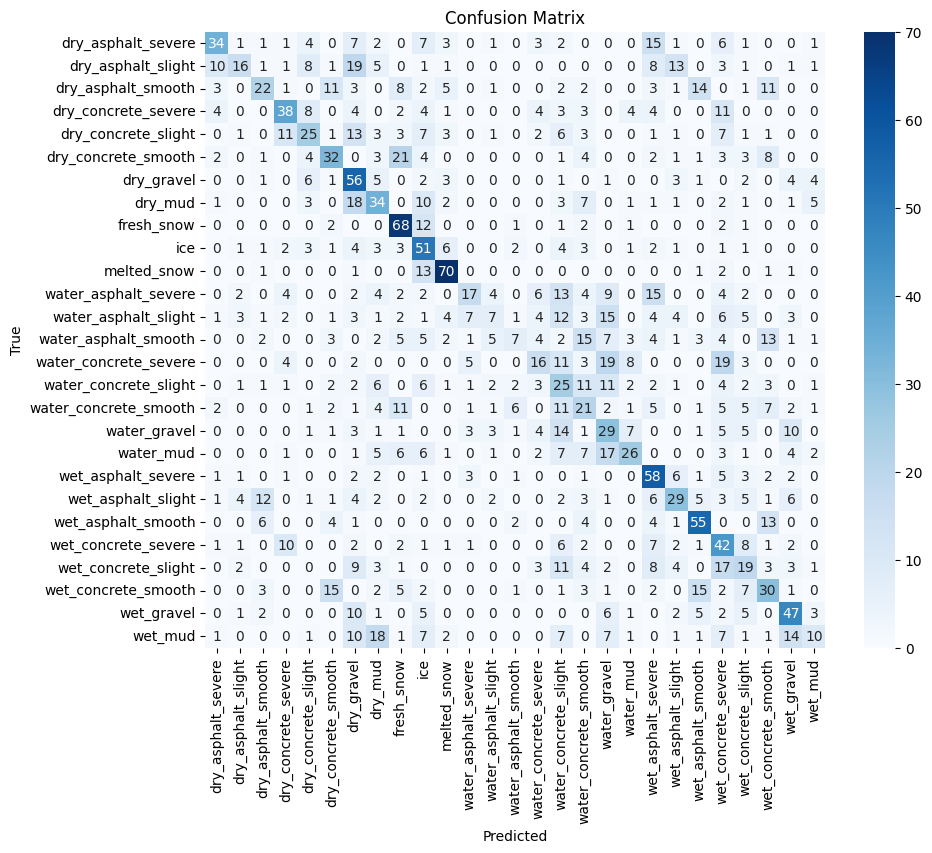

                       precision    recall  f1-score   support

   dry_asphalt_severe       0.56      0.38      0.45        90
   dry_asphalt_slight       0.47      0.18      0.26        90
   dry_asphalt_smooth       0.40      0.24      0.30        90
  dry_concrete_severe       0.49      0.42      0.46        90
  dry_concrete_slight       0.38      0.28      0.32        90
  dry_concrete_smooth       0.41      0.36      0.38        90
           dry_gravel       0.32      0.62      0.42        90
              dry_mud       0.32      0.38      0.35        90
           fresh_snow       0.48      0.76      0.59        90
                  ice       0.34      0.57      0.42        90
          melted_snow       0.67      0.78      0.72        90
 water_asphalt_severe       0.44      0.19      0.26        90
 water_asphalt_slight       0.25      0.08      0.12        90
 water_asphalt_smooth       0.29      0.08      0.12        90
water_concrete_severe       0.31      0.18      0.23  

In [6]:
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Load the trained model

model = tf.keras.models.load_model('best_model.keras')

# Load the test data

test_generator = test_datagen.flow_from_directory(

    'train-set/test',

    target_size=(224, 224),

    batch_size=32,

    class_mode='categorical',

    shuffle=False)

# Make predictions

predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix

conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')

plt.ylabel('True')

plt.title('Confusion Matrix')

plt.show()

# Print classification report

print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Found 2430 images belonging to 27 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2430/2430 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step
Image: train-set/test/dry_asphalt_severe/2022012716562310-dry-asphalt-severe.jpg


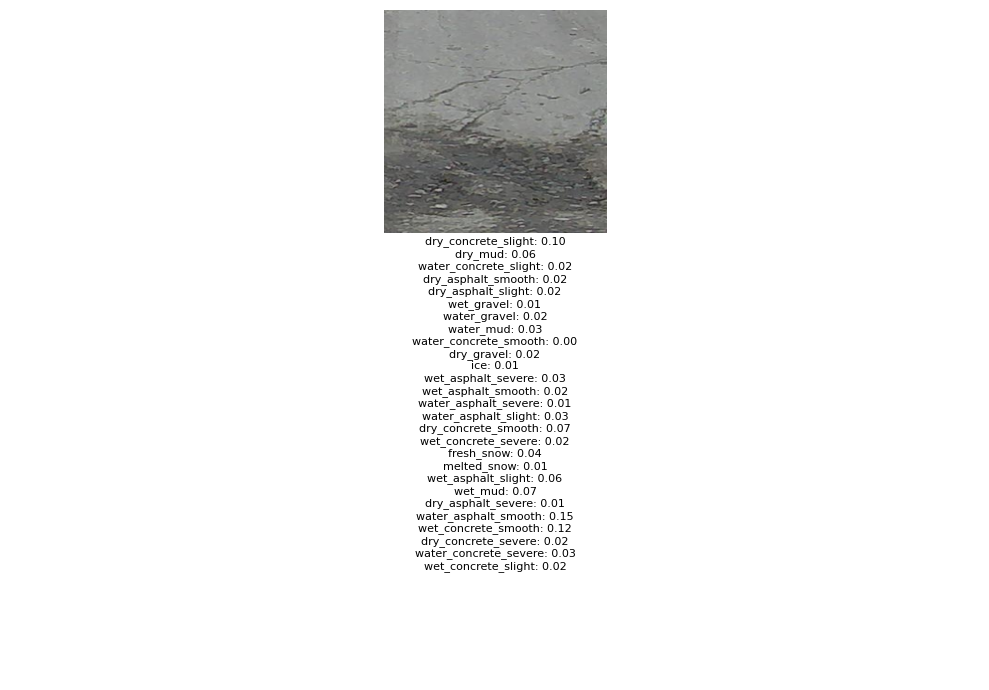

Image: train-set/test/dry_asphalt_severe/2022012717035215-dry-asphalt-severe.jpg


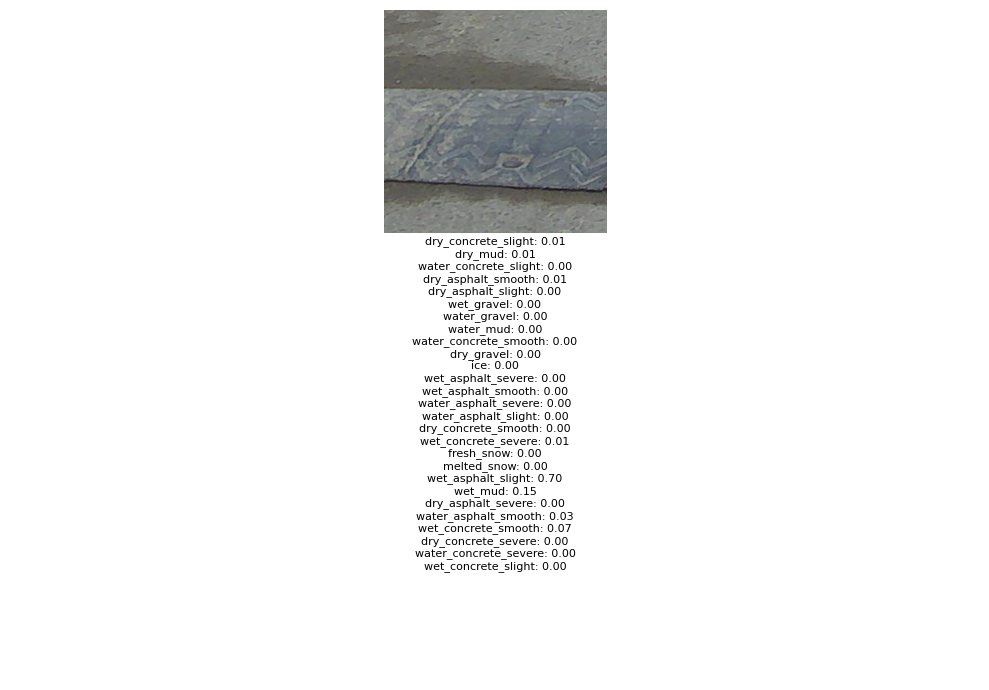

Image: train-set/test/dry_asphalt_severe/2022012717060519-dry-asphalt-severe.jpg


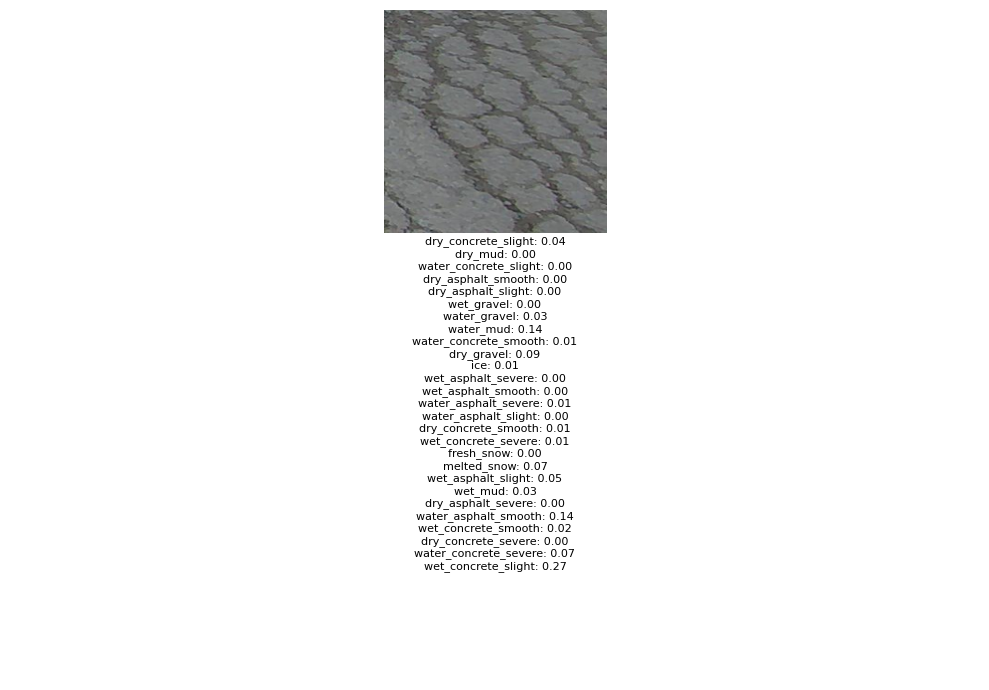

Image: train-set/test/dry_asphalt_severe/2022012717123619-dry-asphalt-severe.jpg


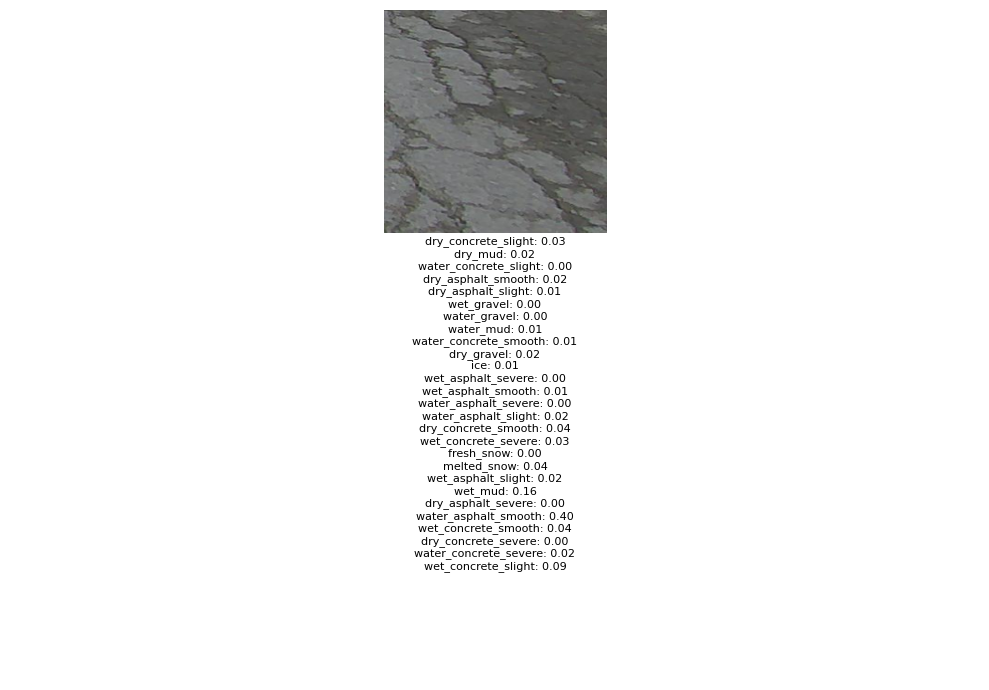

Image: train-set/test/dry_asphalt_severe/202201272001002-dry-asphalt-severe.jpg


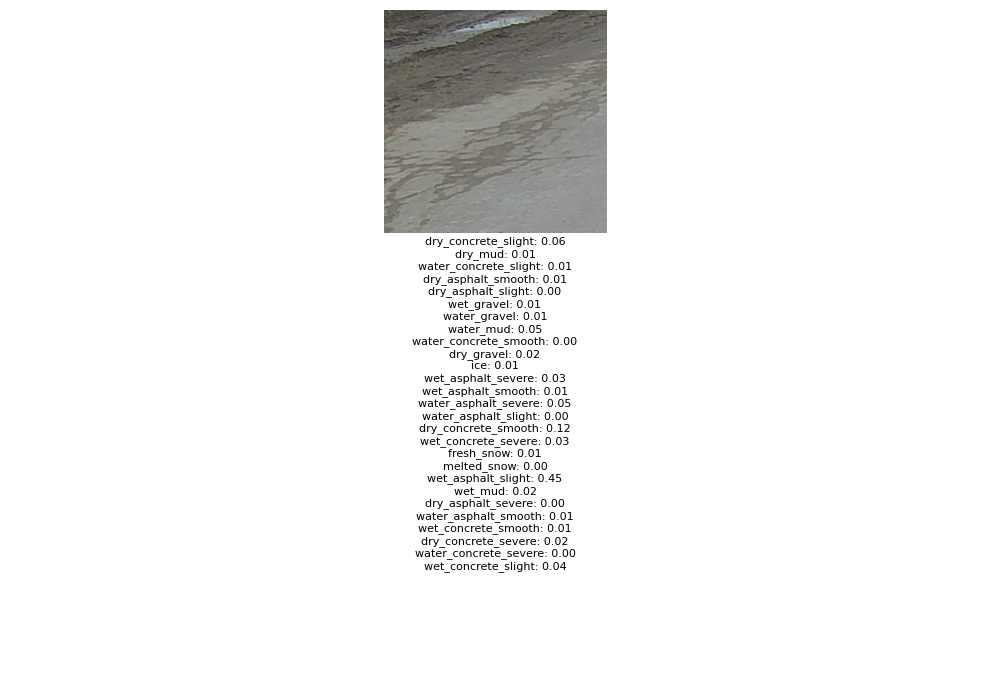

Image: train-set/test/dry_asphalt_severe/202202101140397-dry-asphalt-severe.jpg


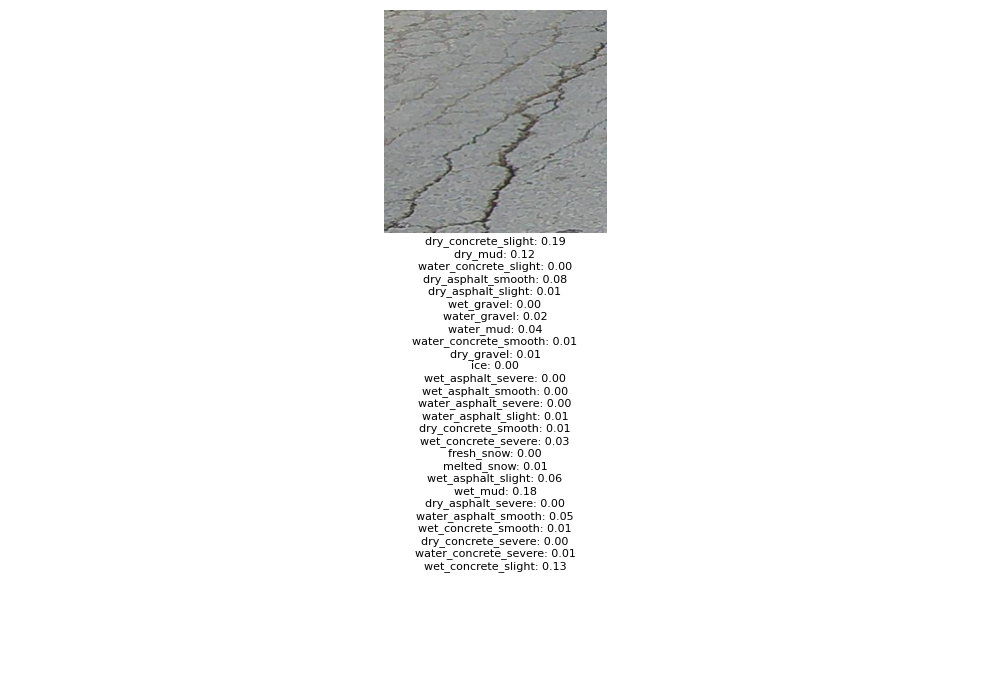

Image: train-set/test/dry_asphalt_severe/2022021011504710-dry-asphalt-severe.jpg


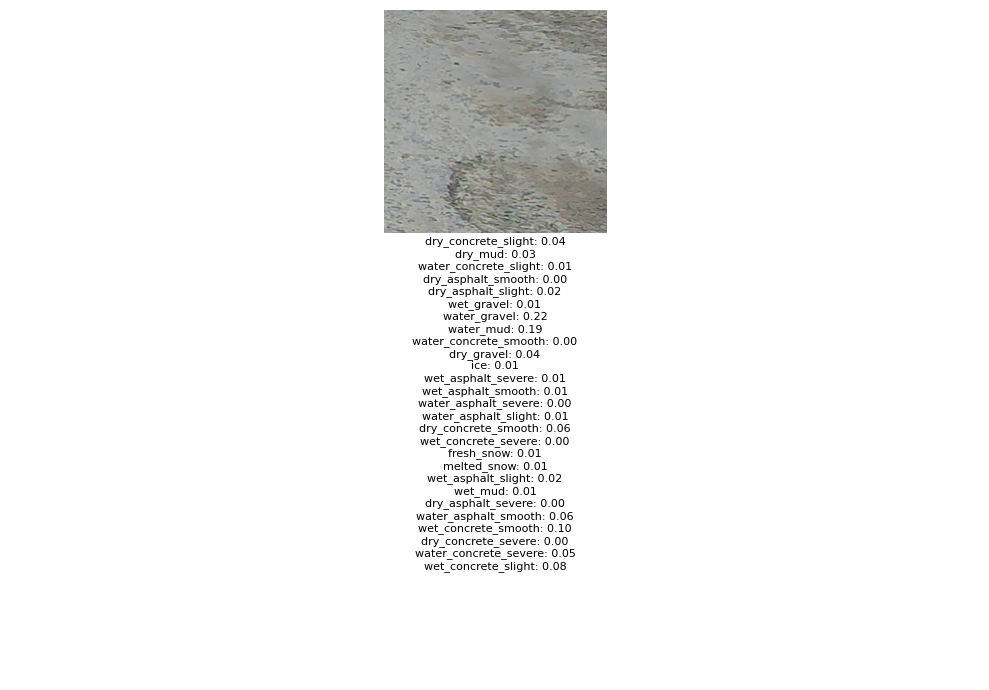

Image: train-set/test/dry_asphalt_severe/202202101436326-dry-asphalt-severe.jpg


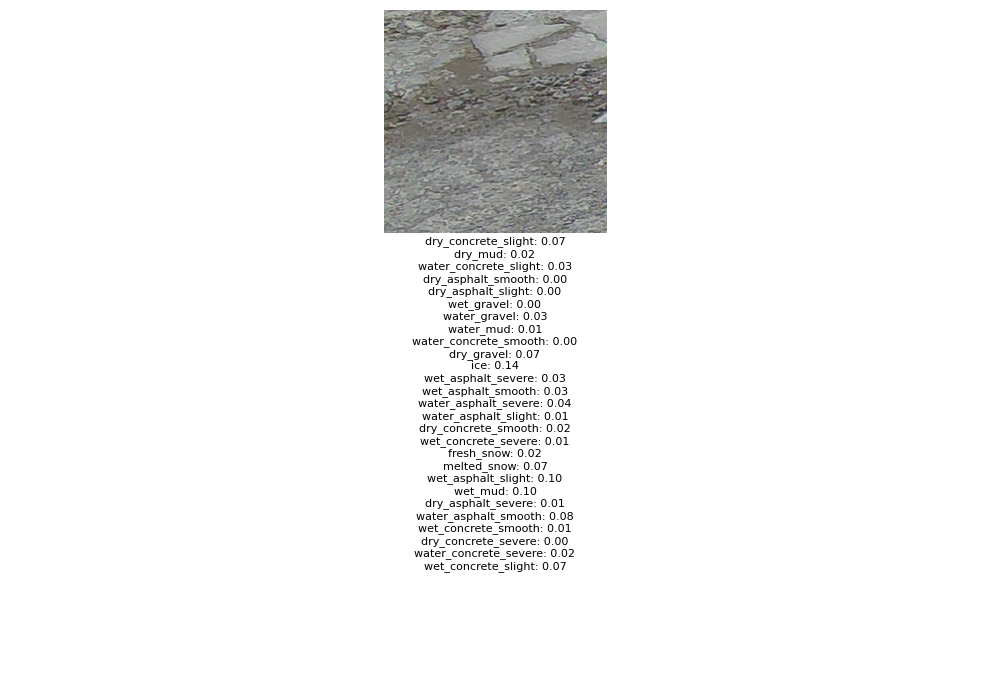

Image: train-set/test/dry_asphalt_severe/2022021015151416-dry-asphalt-severe.jpg


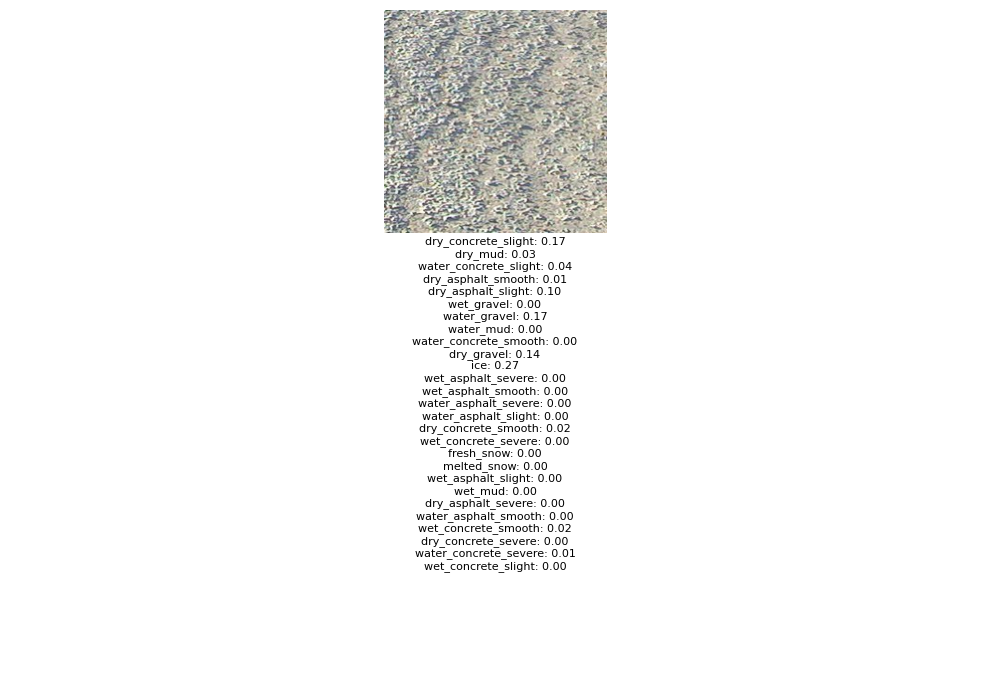

Image: train-set/test/dry_asphalt_severe/202202101517214-dry-asphalt-severe.jpg


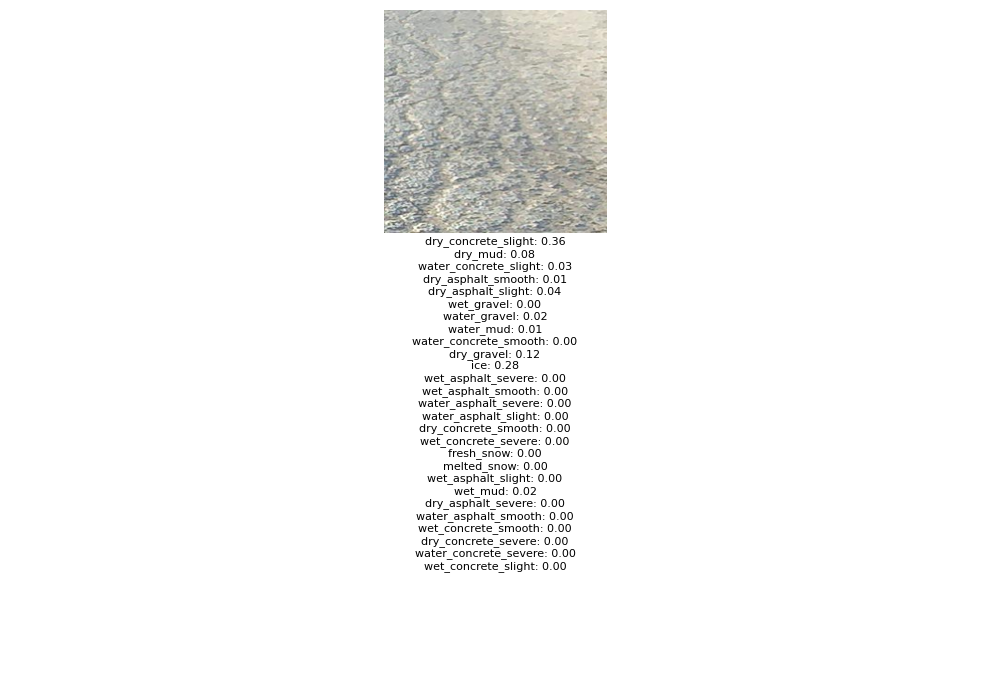

Image: train-set/test/dry_asphalt_severe/2022021015250312-dry-asphalt-severe.jpg


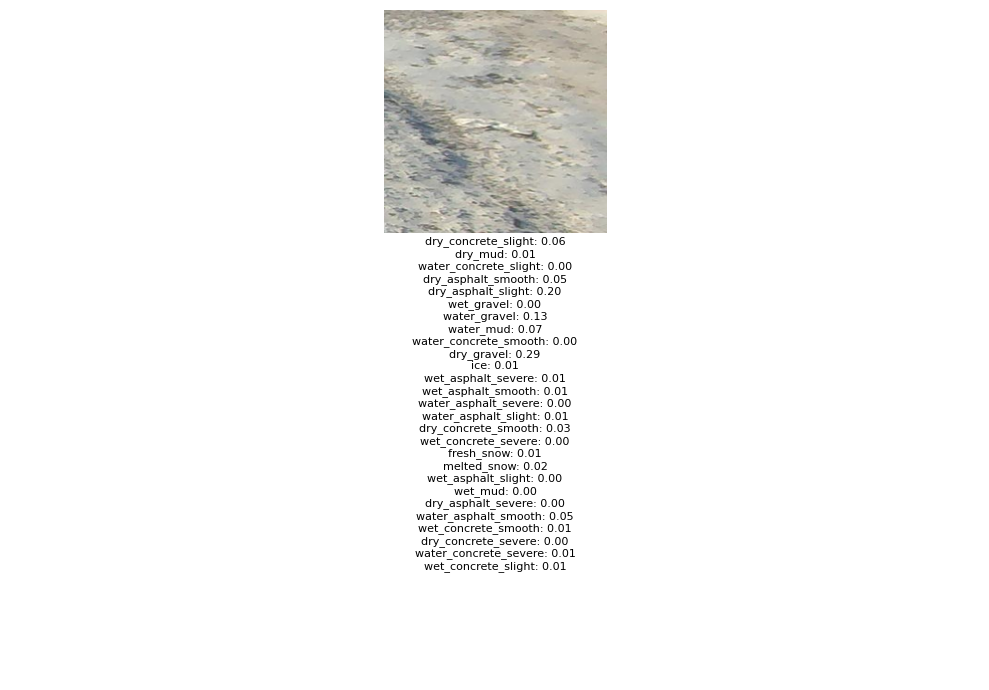

Image: train-set/test/dry_asphalt_severe/2022021015491819-dry-asphalt-severe.jpg


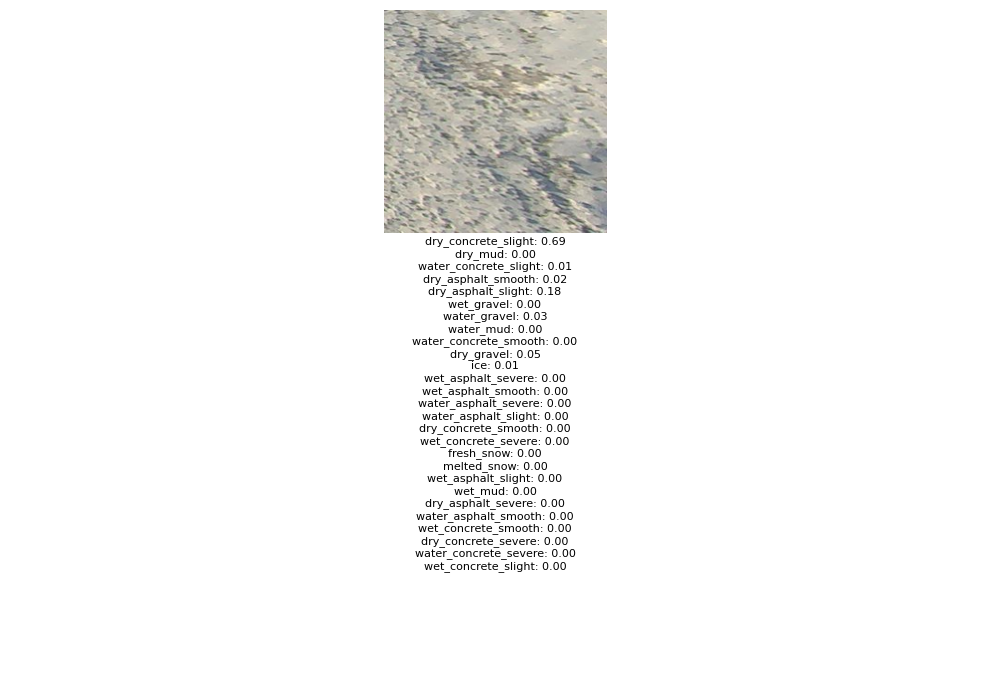

Image: train-set/test/dry_asphalt_severe/202202102057308-dry-asphalt-severe.jpg


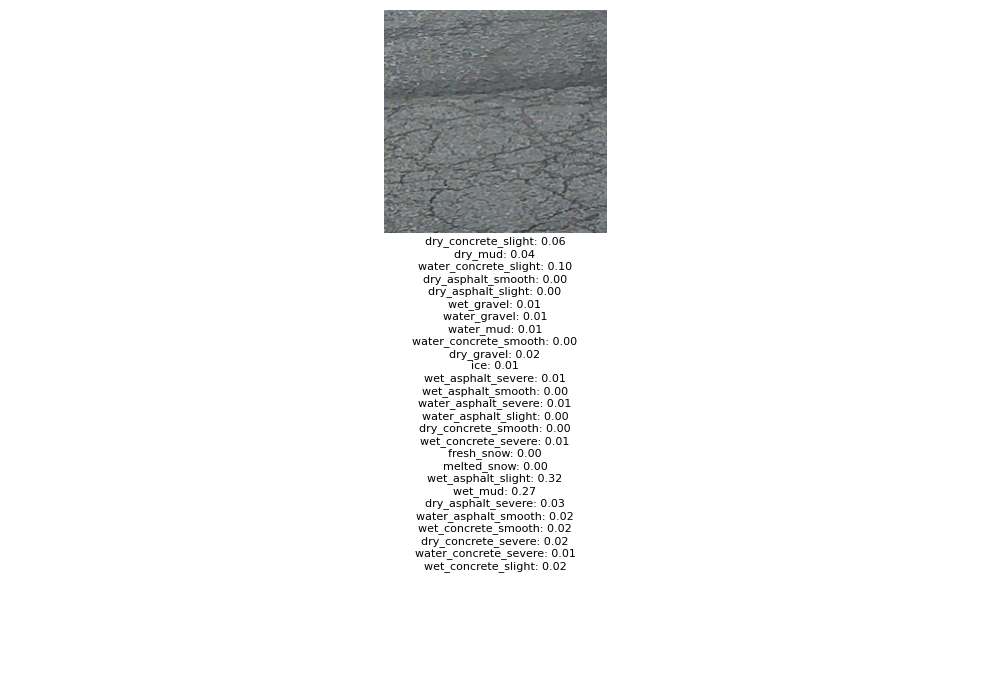

Image: train-set/test/dry_asphalt_severe/202202102235423-dry-asphalt-severe.jpg


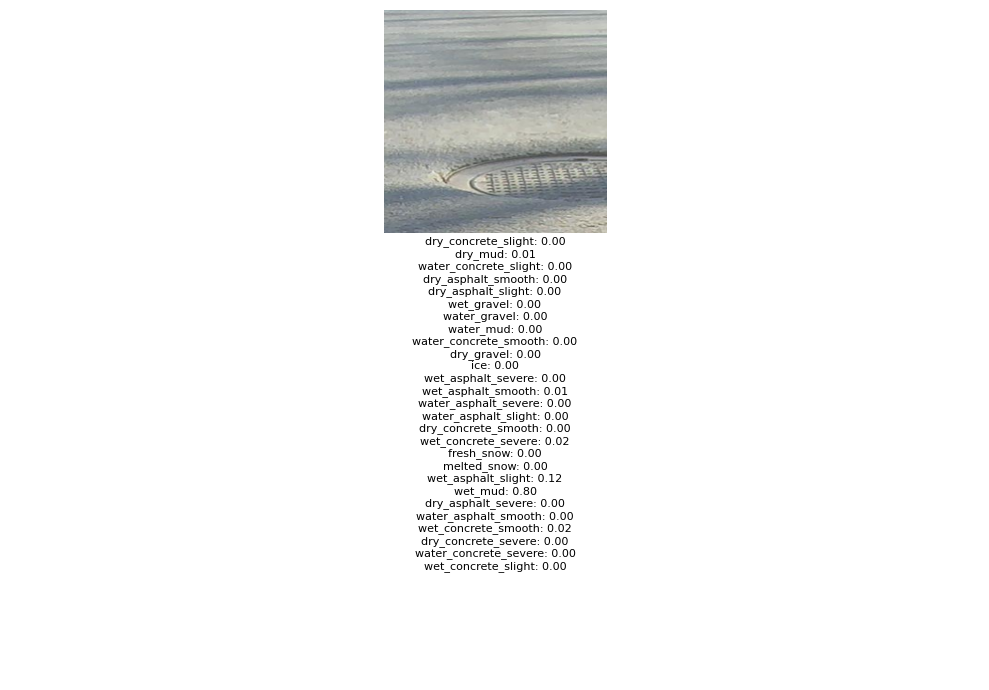

Image: train-set/test/dry_asphalt_severe/2022021113130711-dry-asphalt-severe.jpg


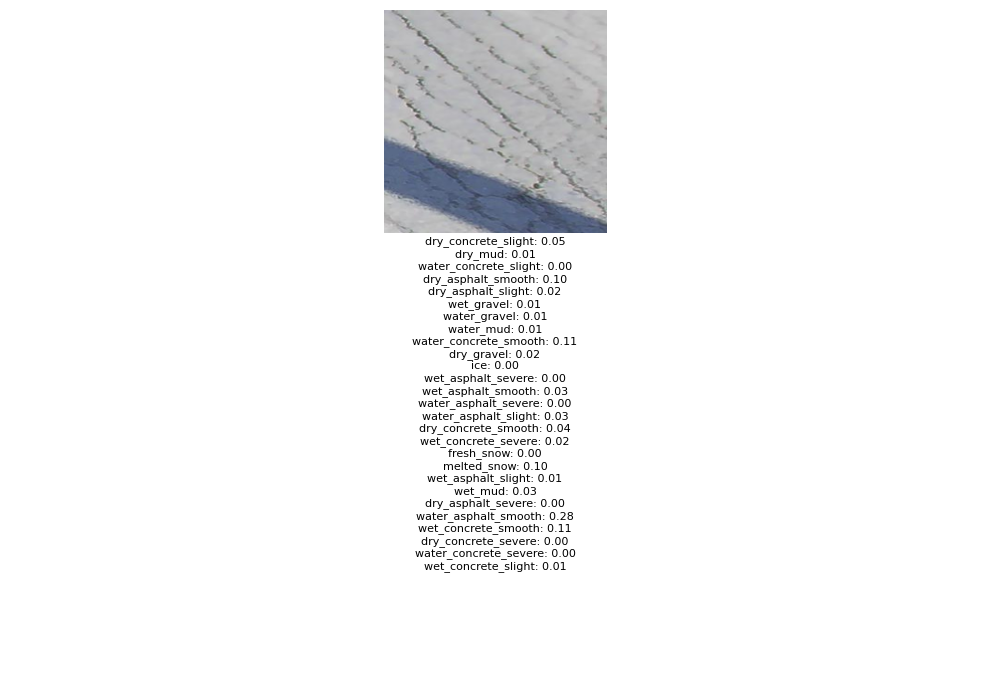

Image: train-set/test/dry_asphalt_severe/2022021113185611-dry-asphalt-severe.jpg


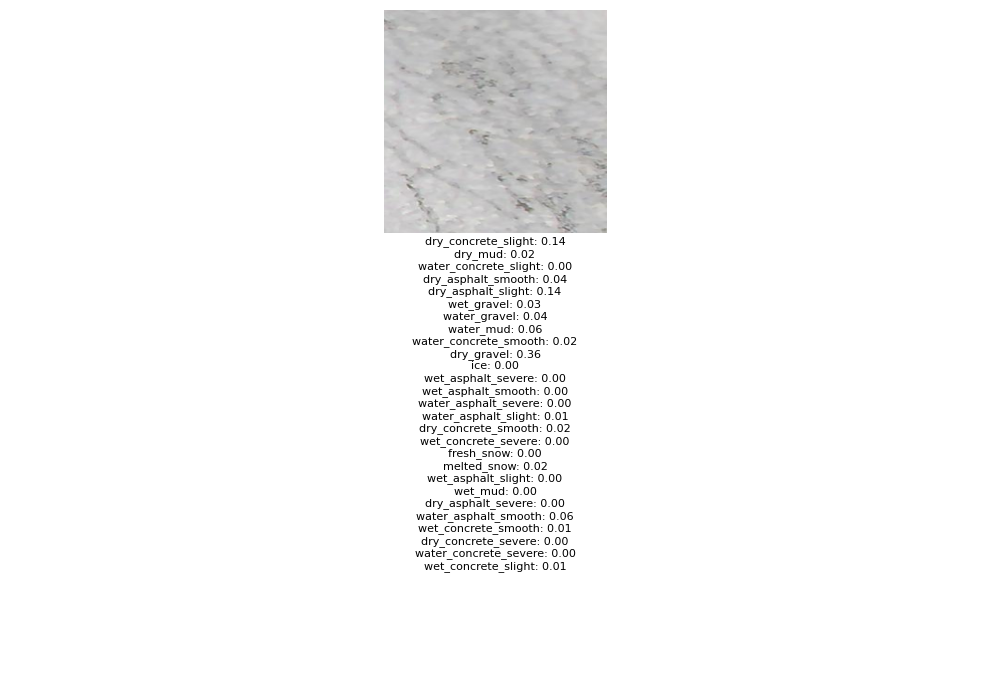

Image: train-set/test/dry_asphalt_severe/2022021113224612-dry-asphalt-severe.jpg


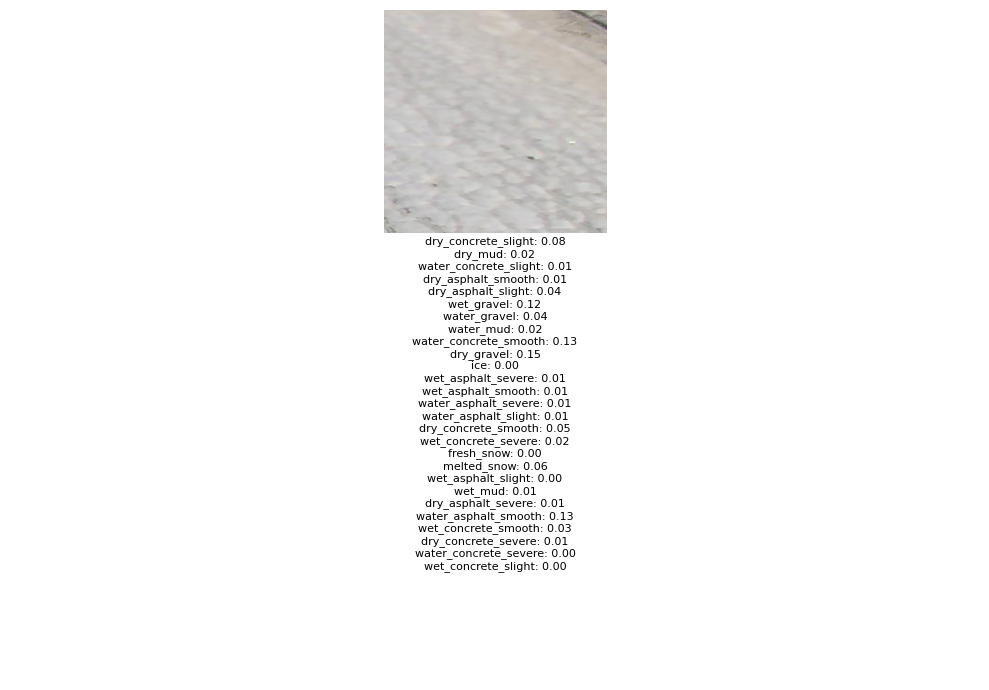

Image: train-set/test/dry_asphalt_severe/202202111348121-dry-asphalt-severe.jpg


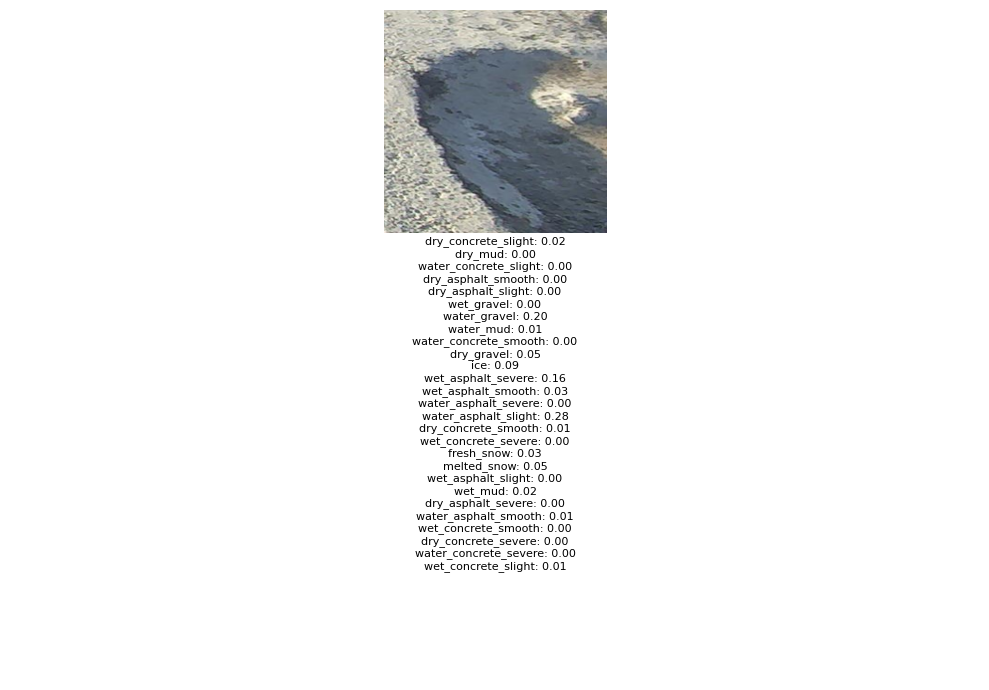

Image: train-set/test/dry_asphalt_severe/202202111357181-dry-asphalt-severe.jpg


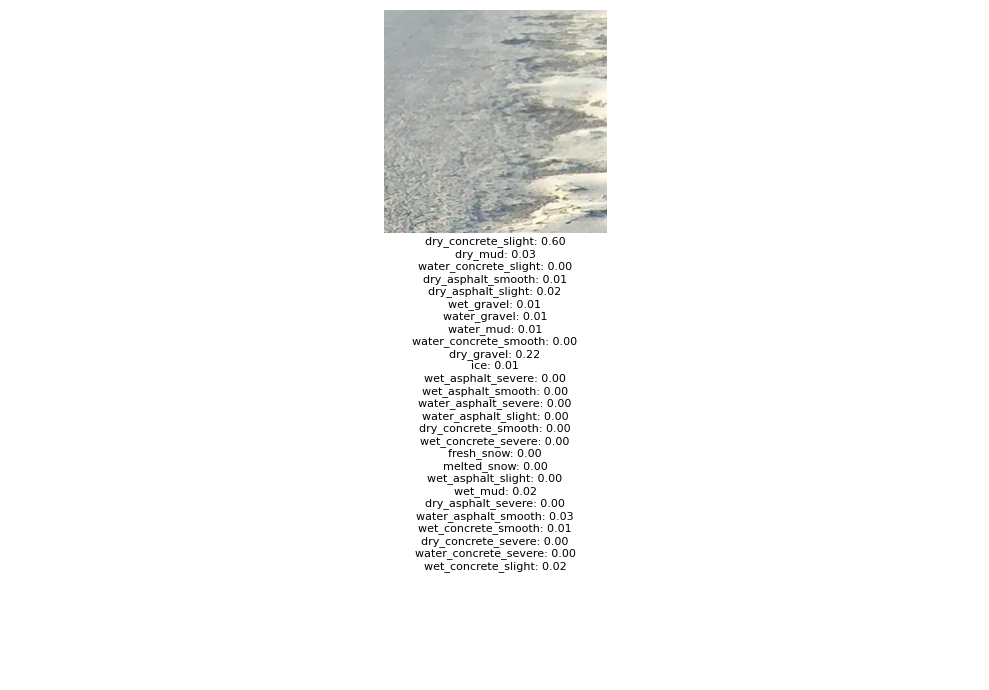

Image: train-set/test/dry_asphalt_severe/202202111401421-dry-asphalt-severe.jpg


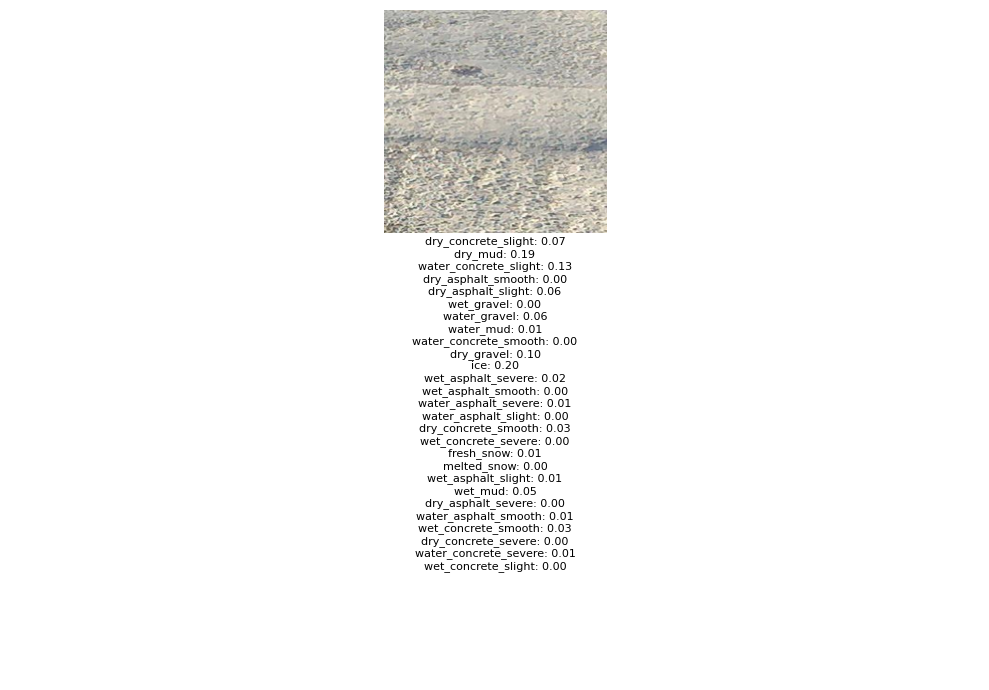

Image: train-set/test/dry_asphalt_severe/202202111431162-dry-asphalt-severe.jpg


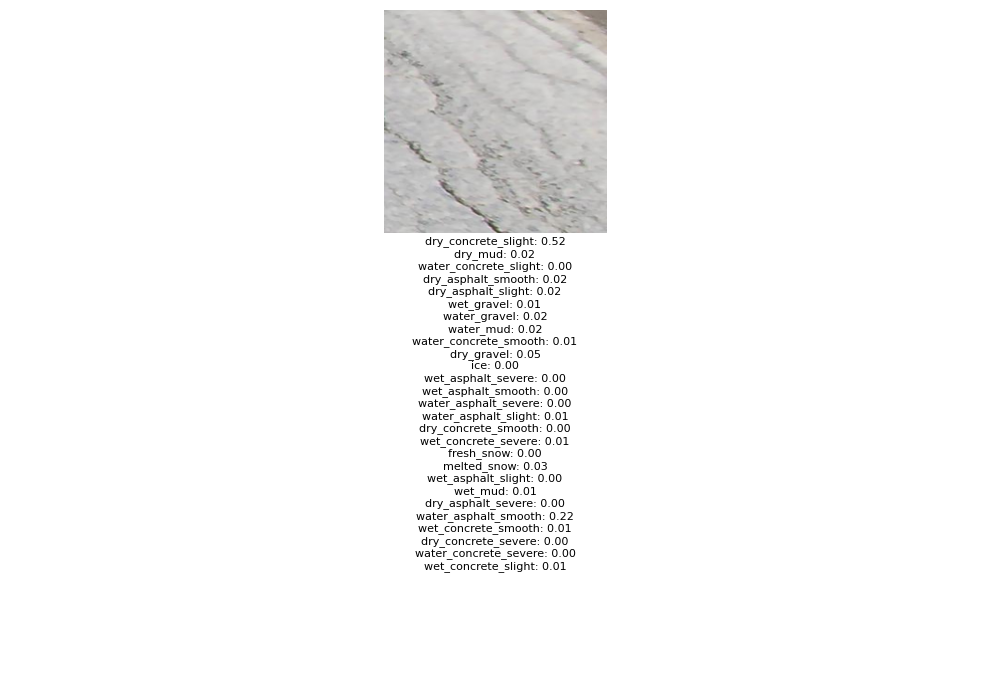

Image: train-set/test/dry_asphalt_severe/202202111436473-dry-asphalt-severe.jpg


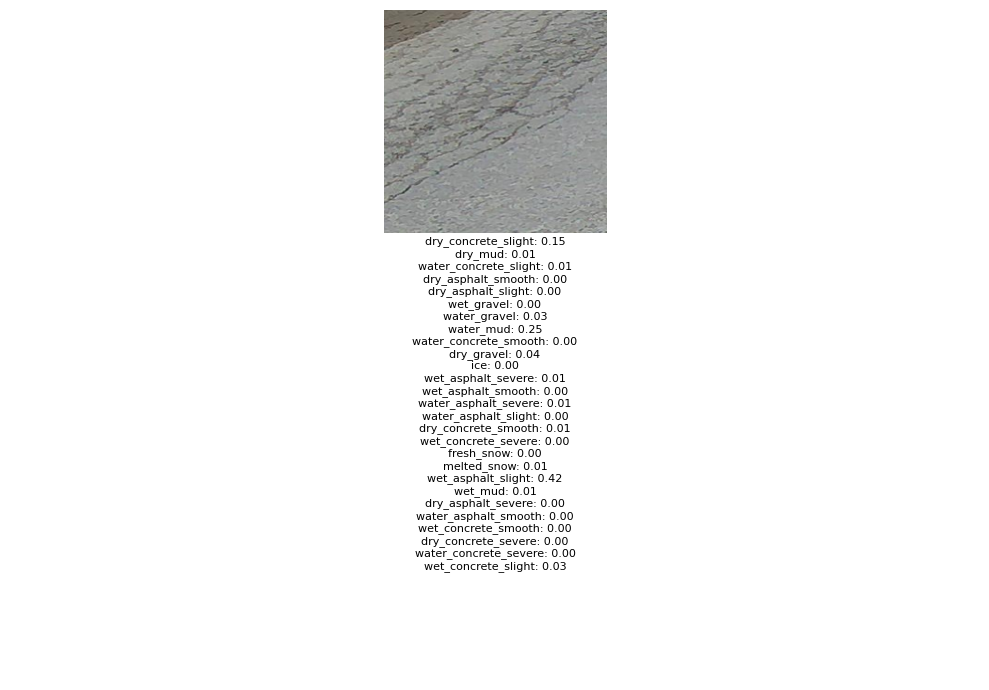

Image: train-set/test/dry_asphalt_severe/202202111446121-dry-asphalt-severe.jpg


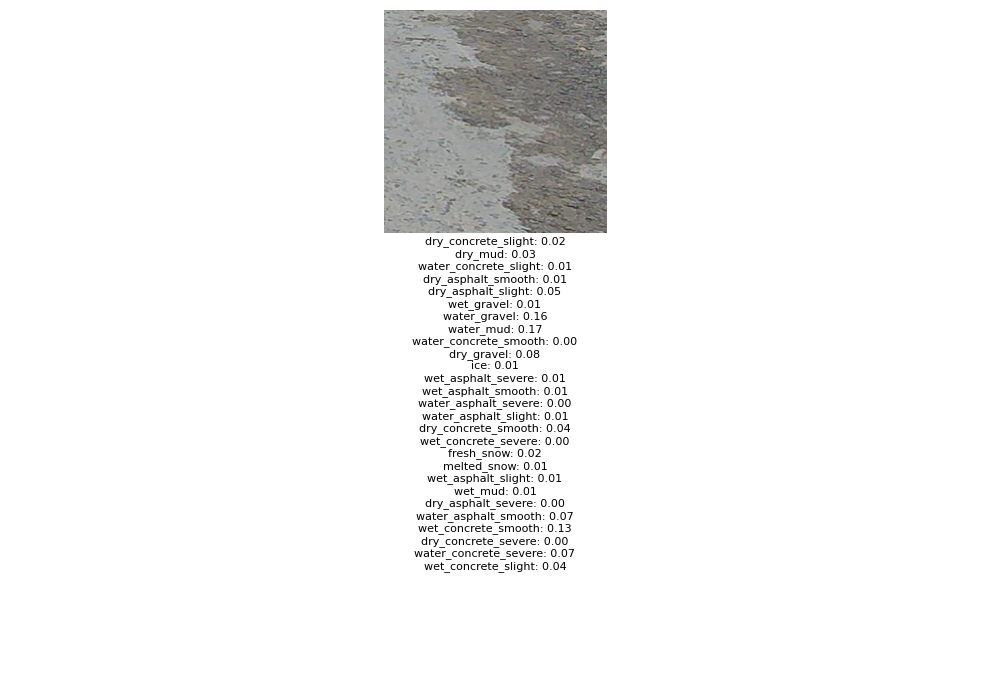

Image: train-set/test/dry_asphalt_severe/202202111449331-dry-asphalt-severe.jpg


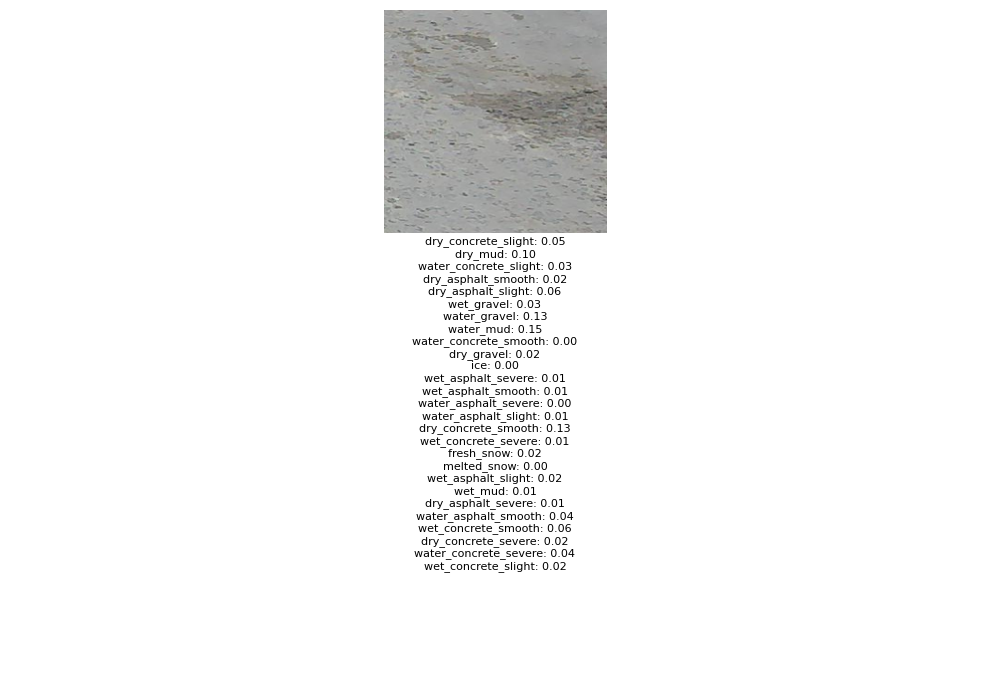

Image: train-set/test/dry_asphalt_severe/202202111453371-dry-asphalt-severe.jpg


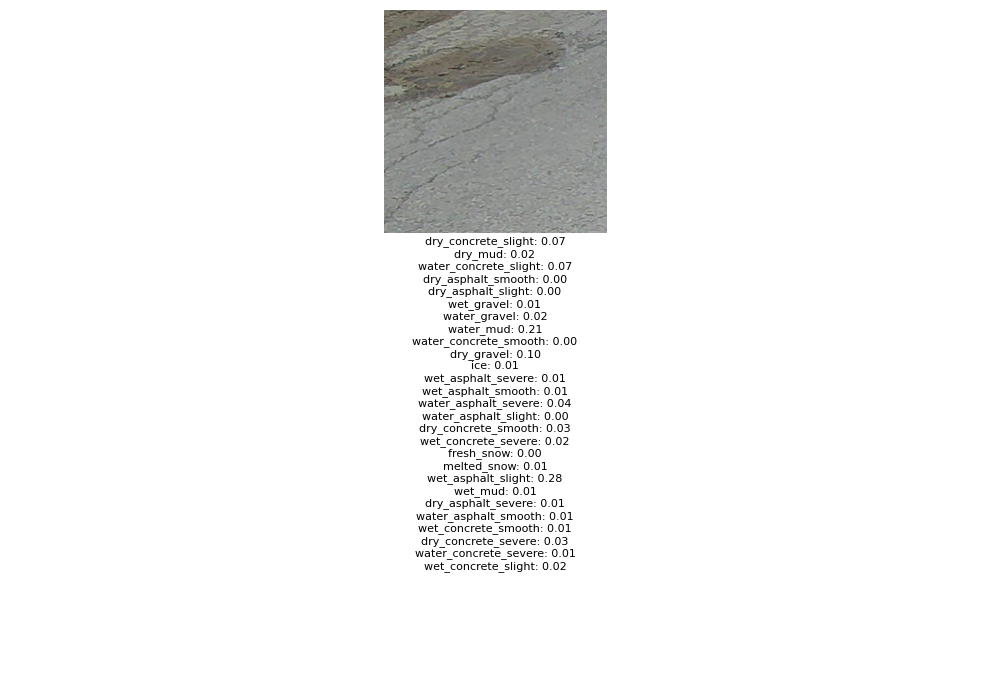

Image: train-set/test/dry_asphalt_severe/202202122021471-dry-asphalt-severe.jpg


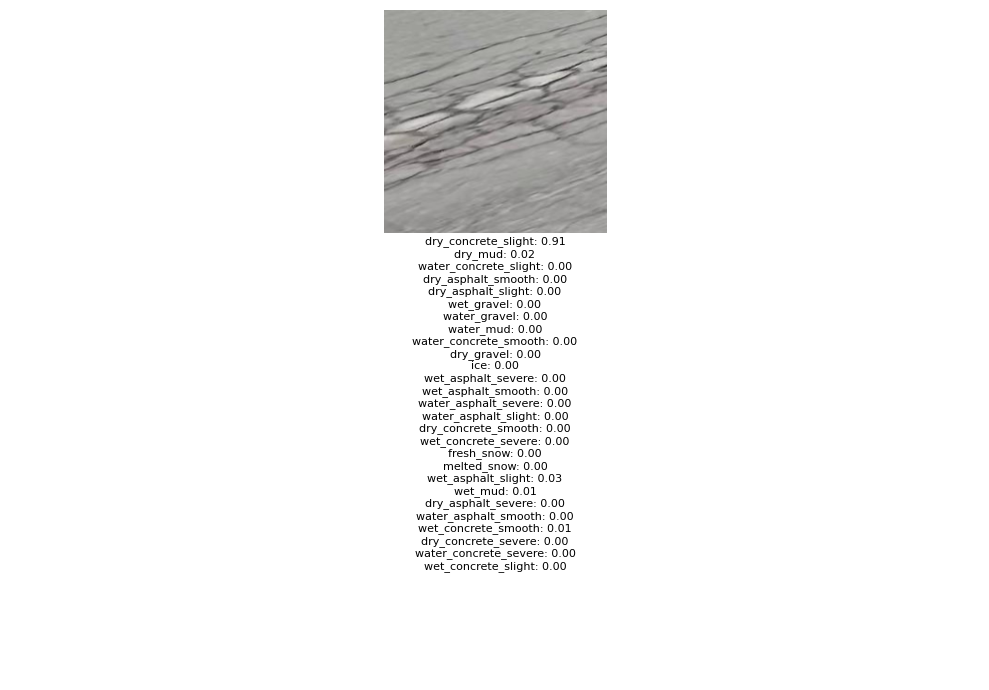

Image: train-set/test/dry_asphalt_severe/202202122027328-dry-asphalt-severe.jpg


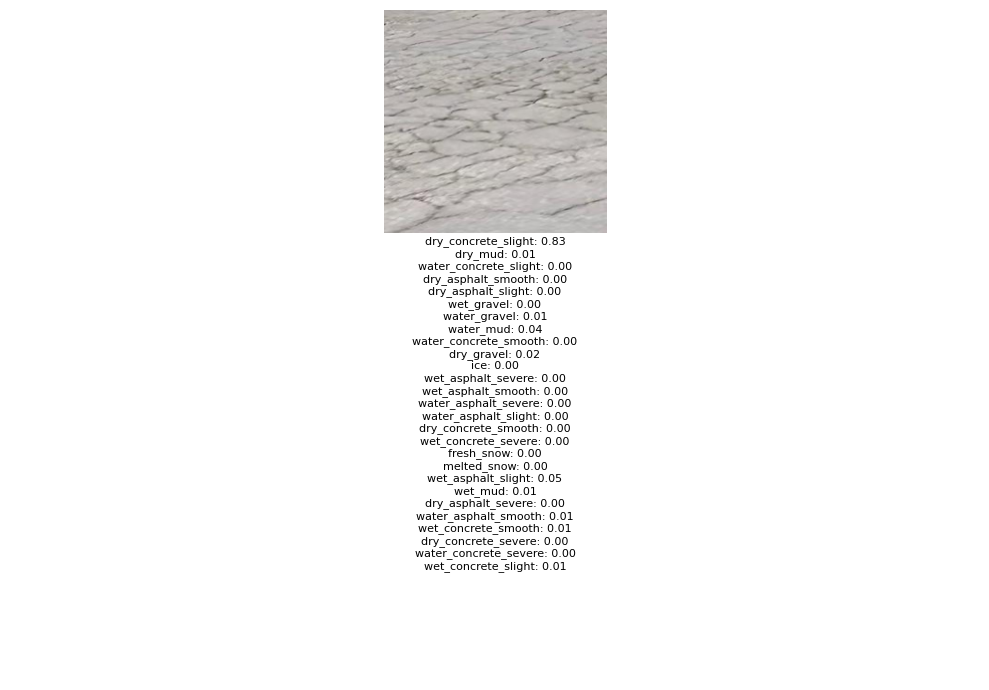

In [7]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

class_names = ["dry_concrete_slight", "dry_mud", "water_concrete_slight", "dry_asphalt_smooth", "dry_asphalt_slight", "wet_gravel", "water_gravel", "water_mud", "water_concrete_smooth", "dry_gravel", "ice", "wet_asphalt_severe", "wet_asphalt_smooth", "water_asphalt_severe", "water_asphalt_slight", "dry_concrete_smooth", "wet_concrete_severe", "fresh_snow", "melted_snow", "wet_asphalt_slight", "wet_mud", "dry_asphalt_severe", "water_asphalt_smooth", "wet_concrete_smooth", "dry_concrete_severe", "water_concrete_severe", "wet_concrete_slight"
]
# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    'train-set/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)

for i, (img, pred) in enumerate(zip(test_generator.filepaths, predictions)):
    if i >= 27:  # Add a conditional statement to break the loop after 27 iterations
        break

    print(f"Image: {test_generator.filepaths[i]}")

    # Create a figure and subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
    ax2.axis('off')

    # Plot the image
    img_path = test_generator.filepaths[i]
    img = Image.open(img_path)
    img = img.resize((224, 224))
    ax1.imshow(img)

    # Print the class probabilities
    text = '\n'.join([f"{class_names[class_index[0]]}: {prob:.2f}" for class_index, prob in np.ndenumerate(pred)])


    # Add text underneath the image
    ax2.text(0.5, 0.5, text, horizontalalignment='center', fontsize=8)
    ax1.axis('off')

    plt.tight_layout()
    plt.pause(0.001)

    # Close the figure after displaying
    plt.close(fig)